In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Function to split the content into chunks
def create_chunks(content, chunk_size=500):
    if isinstance(content, str):  # Ensure content is a string
        chunks = [
            content[i : i + chunk_size] for i in range(0, len(content), chunk_size)
        ]
        return chunks
    return []  # Return empty list if content is not a string


# Load the original CSV
df = pd.read_csv("../../data/official_journal/db.csv")

# Prepare a list to store the new rows
chunked_data = []
chunk_sizes = []
chunks_per_document = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    year = row["year"]
    number = row["number"]
    page = row["page"]
    content = row["content"]

    # If content is NaN or not a string, set it to an empty string
    if pd.isna(content) or not isinstance(content, str):
        content = ""

    # Create chunks for the content
    chunks = create_chunks(content)
    chunks_per_document.append(len(chunks))

    # Add each chunk as a new row
    for chunk_id, chunk in enumerate(chunks, 1):
        chunked_data.append([year, number, page, chunk_id, chunk])
        chunk_sizes.append(len(chunk))  # Store the size of each chunk

# Create a new DataFrame with the chunked data
chunked_df = pd.DataFrame(
    chunked_data, columns=["year", "number", "page", "chunk_id", "chunk"]
)

# Save the chunked data to a new CSV
chunked_df.to_csv("../../data/official_journal/chunked_db.csv", index=False)

print("Chunking completed and saved to 'chunked_db.csv'")

Chunking completed and saved to 'chunked_db.csv'


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


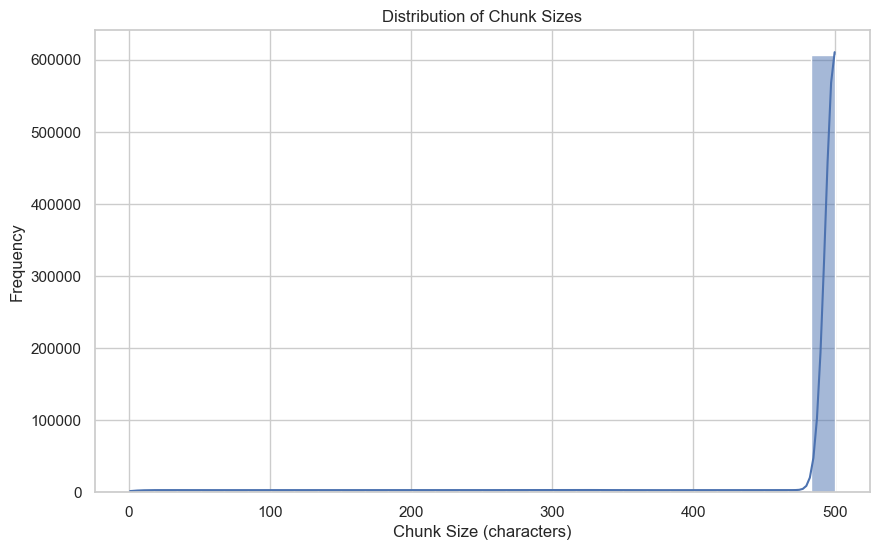

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


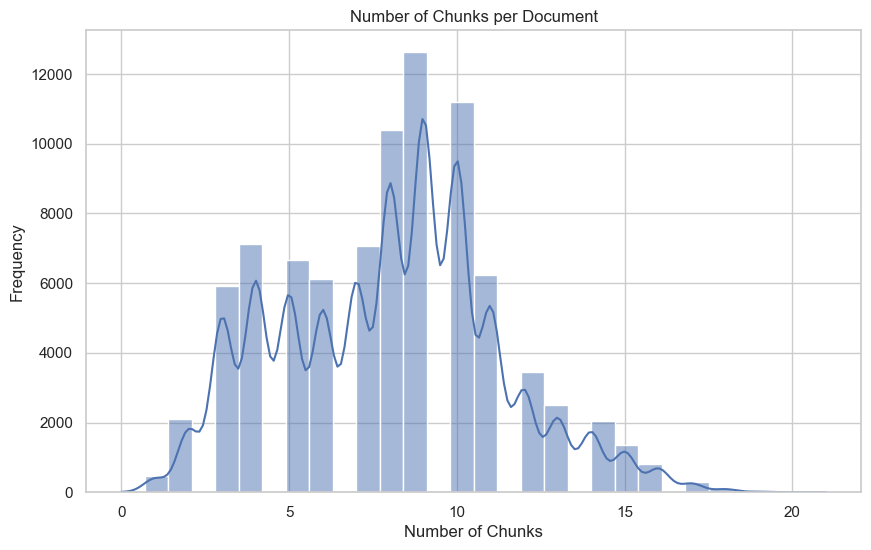

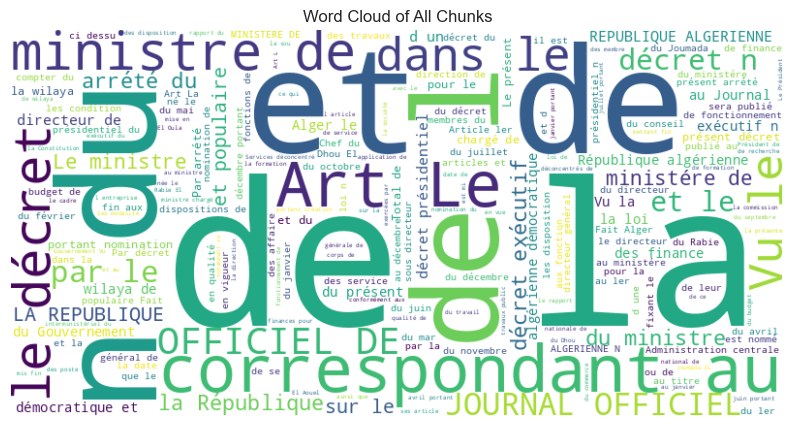

Visualization completed.


In [5]:
# Plotting
# Set up the visualizations style
sns.set(style="whitegrid")

# 1. Distribution of chunk sizes
plt.figure(figsize=(10, 6))
sns.histplot(chunk_sizes, bins=30, kde=True)
plt.title("Distribution of Chunk Sizes")
plt.xlabel("Chunk Size (characters)")
plt.ylabel("Frequency")
plt.show()

# 2. Number of chunks per document
plt.figure(figsize=(10, 6))
sns.histplot(chunks_per_document, bins=30, kde=True)
plt.title("Number of Chunks per Document")
plt.xlabel("Number of Chunks")
plt.ylabel("Frequency")
plt.show()

# 3. Word Cloud of all chunks
# Combine all chunks into a single string
all_chunks = " ".join([chunk for chunk in chunked_df["chunk"]])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    all_chunks
)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of All Chunks")
plt.show()

print("Visualization completed.")